# 첨단 Python 라이브러리를 사용하여 무료 금융 시장 데이터 획득하기

2017년 5월 《이코노미스트》 커버는 데이터를 세계에서 가장 귀중한 자원으로 선언했습니다. 알고리즘 트레이딩에서 이는 더욱 진실입니다. 알고리즘 트레이더로서, 우리는 거래 알고리즘에서 사용하기 위해 수십억 개의 금융 시장 데이터를 수집하고 이해하는 것이 우리의 임무입니다. 이와 같은 맥락에서, 고품질의 신뢰할 수 있는 데이터를 수집하여 거래 알고리즘과 시장 연구를 충분히 지원하는 것이 중요합니다. 다행히도, 무료(혹은 거의 무료)로 고품질 데이터를 획득할 수 있는 방법이 있습니다.

이 장에서는 Python 라이브러리, 특히 첨단 OpenBB 플랫폼을 포함한 다양한 방법을 통해 무료 금융 시장 데이터를 획득하는 방법을 제공합니다. 대부분의 비전문가 트레이더가 직면하는 주요 과제 중 하나는 필요한 데이터를 한 곳에서 모두 가져오는 것입니다. OpenBB 플랫폼은 이러한 문제를 해결해줍니다. 우리는 주식, 옵션, 선물(연속 계약 및 개별 계약), Fama-French 요인을 포함한 다양한 자산 데이터를 획득하는 방법을 탐구할 것입니다.

기억해야 할 중요한 점은 데이터가 다양한 출처에 따라 달라질 수 있다는 점입니다. 예를 들어, 두 데이터 소스의 가격은 서로 다른 데이터 제공 방식이나 기업 활동 조정 방식 때문에 다를 수 있습니다. 이 책에서 다룰 일부 라이브러리는 동일한 자산에 대해 동일한 출처에서 데이터를 다운로드할 수 있습니다. 그러나 라이브러리마다 데이터를 반환하는 방식이 다를 수 있으며, 연구를 준비하는 데 도움이 되는 사전 처리 옵션도 제공됩니다.

마지막으로, 이 장에서는 주로 전통적인 금융 데이터를 중점적으로 다루지만, 금융 데이터는 가격 데이터에 국한되지 않습니다. 위성 이미지, 웹 트래픽 데이터, 고객 리뷰와 같은 비전통적인 데이터 소스도 거래 전략을 개발하는 데 중요한 정보가 될 수 있습니다. 이러한 유형의 데이터를 획득하고 처리하는 방법은 이 책의 범위를 벗어나므로 의도적으로 제외했습니다. 이 주제는 이와 관련된 별도의 자료에서 다룹니다.

이 장에서는 다음 내용을 다룰 예정입니다:

- OpenBB 플랫폼을 활용한 주식 시장 데이터 작업
- OpenBB 플랫폼을 활용한 과거 선물 데이터 가져오기
- OpenBB 플랫폼을 활용한 옵션 시장 데이터 탐색
- `pandas_datareader`를 활용한 요인 데이터 처리

## Technical requirements

**기술 요구 사항**

이 책은 Python의 Anaconda 배포판에 의존합니다. 코드는 Jupyter Notebook과 Python 스크립트 파일을 사용하여 작성됩니다. 별도로 명시하지 않는 한, 모든 코드는 Jupyter Notebook에서 작성할 수 있습니다.

1. **Anaconda 배포판 다운로드 및 설치**  
   Anaconda 배포판은 [https://www.anaconda.com/download](https://www.anaconda.com/download)에서 다운로드할 수 있습니다. 운영 체제에 따라 설치 및 설정 방법이 다릅니다. 자세한 설치 지침은 Anaconda 문서를 참조하세요.

   Anaconda는 **conda**라는 패키지 관리자를 포함하고 있습니다. 패키지 관리자를 사용하면 Python 패키지를 쉽게 설치, 제거, 업데이트할 수 있습니다. [여기](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)에서 conda 치트 시트를 확인할 수 있습니다.

2. **Anaconda 설치 후**  
   Anaconda 배포판 설치 후, Mac/Linux 사용자는 터미널을 열고, Windows 사용자는 Anaconda Prompt를 사용하세요. Windows 사용자는 Powershell 프롬프트가 아닌 Command Prompt를 사용하는 것이 좋습니다. 그런 다음 아래 단계를 따르세요:

   1. **패키지 관리자 업데이트:**  
      ```bash
      conda update -n base conda -y
      ```

   2. **가상 환경 생성:**  
      ```bash
      conda create -n my-quant-stack python=3.10 -y
      ```

   3. **가상 환경 활성화:**  
      ```bash
      conda activate my-quant-stack
      ```

   4. **Jupyter Notebook 설치:**  
      Python과 함께 제공되는 패키지 관리자인 pip를 사용하여 설치:  
      ```bash
      pip install notebook matplotlib
      ```

      위 단계를 완료하면 Python 3.10을 사용하여 가상 환경이 설정되고 Jupyter Notebook이 설치됩니다.

---

### 사용 라이브러리

이 책에서는 금융 시장 데이터를 획득하기 위해 두 가지 Python 라이브러리를 사용할 것입니다: **OpenBB 플랫폼**과 **pandas_datareader**.  
OpenBB 플랫폼을 설치하면 금융 시장 데이터를 수집하는 데 필요한 많은 라이브러리(pandas_datareader 포함)가 함께 설치되므로, 개별 라이브러리를 별도로 설치할 필요가 없습니다.

**OpenBB 플랫폼 설치**
OpenBB 플랫폼을 모든 확장 기능 및 공급자(공식 지원 및 커뮤니티 유지 보수 포함)와 함께 설치하려면 pip를 사용하세요:
```bash
pip install openbb[all]
```
이 책에서 OpenBB 플랫폼을 설정하는 가장 쉬운 방법입니다.

---

### 주의 사항

1. **MacOS 사용자의 경우**  
   MacOS의 zsh 터미널에서 `openbb[all]`와 같은 라이브러리 이름 주위에 따옴표를 추가하세요:  
   ```bash
   pip install "openbb[all]"
   ```

2. **단일 확장 기능 설치:**  
   - 차트 기능:
     ```bash
     pip install openbb[charting]
     ```
   - 거래 기능:
     ```bash
     pip install openbb[ta]
     ```

3. **단일 공급자 설치:**  
   - Yahoo Finance:
     ```bash
     pip install openbb[yfinance]
     ```

4. **Nightly 버전 설치:**  
   모든 기능이 기본으로 설치됩니다:
     ```bash
     pip install openbb-nightly
     ```

---

**추가 주의 사항**

Google Colab 및 Kaggle과 같은 환경에서는 미리 설치된 패키지와의 충돌로 인해 OpenBB 플랫폼 설치가 호환되지 않을 수 있습니다. 문제가 발생하면 OpenBB 플랫폼의 최신 온라인 문서를 참조하세요.

## Working with stock market data with the OpenBB Platform

**OpenBB 플랫폼을 사용한 주식 시장 데이터 작업**

2021년 1월 GameStop 주식이 1,744% 상승하면서 발생한 주식 열풍을 기억할 것입니다. 이 에피소드에서 얻어진 긍정적인 결과 중 하나는 OpenBB(이전의 Gamestonk Terminal)가 등장했다는 점입니다. OpenBB는 GitHub에서 가장 인기 있는 오픈소스 금융 프로젝트 중 하나로, 그 이유는 데이터를 표준 방식으로 쉽게 접근할 수 있는 단일 인터페이스를 제공하기 때문입니다. OpenBB는 수동 투자 연구에 적합한 명령줄 인터페이스를 제공합니다. 하지만 데이터를 Python으로 가져올 때는 OpenBB 플랫폼이 필요합니다. 이번 장에서는 OpenBB 플랫폼을 사용하여 주식 시장 데이터를 가져오는 과정을 안내합니다.

---

### 준비하기

이제 가상 환경에 OpenBB 플랫폼이 설치되어 있어야 합니다. 설치가 완료되지 않았다면, 이 장의 시작 부분으로 돌아가 설정을 완료하세요. OpenBB 플랫폼은 무료로 제공되며, 설정 파일을 관리하고 API 키를 저장하며 코드 예제와 가이드를 제공하는 웹 기반 UI도 지원합니다. 무료 허브 계정을 생성하려면 [my.openbb.co/login](https://my.openbb.co/login)으로 이동하세요.  
또한 인기 있는 과정인 [Getting Started with Python for Quant Finance](https://www.pyquantnews.com/getting-started-with-python-for-quant-finance)를 통해 모든 코드를 OpenBB를 활용해 학습할 수 있습니다.

---

### 수행 방법

OpenBB 플랫폼을 사용하는 기본 과정은 다음과 같습니다:

1. **OpenBB 플랫폼 가져오기**  

In [1]:
from IPython.display import display
from openbb import obb

Extensions to add: alpha_vantage@1.3.5, biztoc@1.3.5, cboe@1.3.5, ecb@1.3.5, econometrics@1.4.5, finra@1.3.5, finviz@1.2.5, government_us@1.3.5, multpl@1.0.5, nasdaq@1.3.5, openbb_charting@2.2.5, quantitative@1.3.5, seeking_alpha@1.3.5, stockgrid@1.3.5, technical@1.3.5, tmx@1.2.5, tradier@1.2.5, wsj@1.3.5

Building...


In [2]:
obb.user.preferences.output_type = "dataframe"

2. **SPY ETF의 가격 데이터를 다운로드하기 위해 historical 메서드 사용**  

In [3]:
data = obb.equity.price.historical("SPY", provider="yfinance")

3. **결과 데이터프레임 확인**  

In [4]:
display(data.head(10))

,open,high,low,close,volume,dividend
date,,,,,,
2023-12-11,459.690002,462.170013,459.470001,461.989990,65002200,0.000
2023-12-12,461.630005,464.200012,460.600006,464.100006,68327600,0.000
2023-12-13,464.489990,470.760010,464.119995,470.500000,93278000,0.000
2023-12-14,472.500000,473.730011,469.250000,472.010010,119026000,0.000
2023-12-15,469.489990,470.700012,467.429993,469.329987,141319300,1.906
2023-12-18,470.980011,472.980011,469.890015,471.970001,70375300,0.000
2023-12-19,472.529999,474.920013,472.450012,474.839996,55761800,0.000
2023-12-20,473.959991,475.899994,467.820007,468.260010,102921000,0.000
2023-12-21,471.329987,472.980011,468.839996,472.700012,86667500,0.000


"yfinance" 제공자를 사용하여 "AAPL"과 "MSFT" 주식의 기본 지표를 가져오고 데이터프레임을 전치

In [5]:
data = obb.equity.fundamental.metrics("AAPL,MSFT", provider="yfinance")

In [6]:
display(data.T)

,0,1
symbol,AAPL,MSFT
market_cap,3729823629312.0,3316105084928.0
pe_ratio,40.65074,36.83072
forward_pe,29.780296,29.673222
peg_ratio_ttm,2.5091,2.3496
enterprise_to_ebitda,27.659,24.286
earnings_growth,-0.341,0.104
earnings_growth_quarterly,-0.358,0.107
revenue_per_share,25.485,34.202
revenue_growth,0.061,0.16


"finviz" 제공자를 사용하여 산업별 가치평가 지표를 가져오고 데이터를 표시

In [7]:
data = obb.equity.compare.groups(
    group="industry", metric="valuation", provider="finviz"
)

In [8]:
display(data)

,name,market_cap,performance_1d,forward_pe,eps_growth_past_5y,eps_growth_next_5y,volume,price_to_sales,price_to_book,price_to_cash,price_to_free_cash_flow,sales_growth_past_5_years,pe,peg
0,Pharmaceutical Retailers,8240000000,0.0351,6.54,-0.0599,-0.0002,23670000,0.06,0.76,2.55,432.95,0.0547,NaN,NaN
1,Marine Shipping,33290000000,-0.0067,7.06,0.2214,0.1997,24430000,1.02,0.91,4.60,5.90,0.2283,4.81,0.24
2,Insurance - Reinsurance,48810000000,-0.0150,7.26,0.5437,0.0323,2470000,0.87,1.17,NaN,2.56,0.2245,6.33,1.96
3,REIT - Mortgage,60690000000,0.0043,7.68,-0.2239,0.0271,48000000,2.02,0.89,4.07,14.12,0.2875,15.11,5.58
4,Coking Coal,10400000000,0.0084,8.29,0.0618,0.0660,2890000,1.01,1.69,6.82,11.18,0.1575,10.18,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,REIT - Healthcare Facilities,165360000000,-0.0085,64.29,-0.1274,0.1292,35660000,6.96,2.11,24.22,28.59,0.1207,97.52,7.55
141,REIT - Office,100020000000,0.0233,75.51,-0.2092,0.0114,52810000,5.09,1.49,11.20,18.05,0.0581,80.61,70.52
142,Infrastructure Operations,34880000000,-0.0054,162.62,NaN,0.1267,1380000,3.33,7.42,8.41,32.63,0.0789,37.89,2.99
143,Shell Companies,29340000000,0.0028,164.04,NaN,NaN,8920000,15.50,2.44,37.50,184.00,0.7636,69.22,NaN


"finviz" 제공자를 사용하여 산업별 성과 지표를 가져오고 데이터를 표시

In [9]:
data = obb.equity.compare.groups(
    group="industry", metric="performance", provider="finviz"
)

In [10]:
display(data)

,name,performance_1d,performance_1w,performance_1m,performance_3m,performance_6m,performance_1y,performance_ytd,analyst_recommendation,volume,volume_average,volume_relative
0,Aluminum,-0.0092,-0.0660,-0.0589,0.3518,-0.0358,0.4956,0.1407,1.94,8340000,7860000,1.06
1,Healthcare Plans,0.0201,-0.0638,-0.0598,-0.1010,0.0052,-0.0490,-0.0426,1.60,39930000,40390000,0.99
2,Coking Coal,0.0084,-0.0630,-0.0785,0.2823,-0.0955,-0.0653,-0.1222,2.02,2890000,3130000,0.92
3,Thermal Coal,-0.0090,-0.0608,-0.0897,0.2084,0.0880,0.1420,0.1144,1.44,3140000,4210000,0.75
4,Trucking,0.0054,-0.0569,-0.0379,0.1521,0.1921,0.2199,0.1190,2.42,10470000,9210000,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Other Precious Metals & Mining,0.0486,0.0589,-0.0325,0.1703,0.0194,0.2826,0.1420,1.97,48870000,38280000,1.28
141,Electronic Gaming & Multimedia,0.0291,0.0650,0.1011,0.2475,0.2115,0.1582,0.1731,1.76,151610000,31970000,4.74
142,Internet Retail,0.0065,0.0668,0.0489,0.2306,0.1722,0.4409,0.3871,1.34,207960000,189300000,1.10
143,Paper & Paper Products,0.0166,0.0681,0.0589,0.1563,0.1613,0.1699,0.0620,1.54,3410000,3600000,0.95


"finviz" 제공자를 사용하여 산업별 개요 지표를 가져오고 데이터를 표시

In [11]:
data = obb.equity.compare.groups(group="industry", metric="overview", provider="finviz")

In [12]:
display(data)

,name,market_cap,performance_1d,dividend_yield,pe,forward_pe,peg,float_short,volume,Stocks
0,Utilities - Independent Power Producers,81240000000,-0.0558,0.0111,19.34,17.50,1.70,0.0253,12370000,6
1,Uranium,38680000000,-0.0557,0.0013,126.45,56.94,1.95,0.0777,51830000,9
2,Telecom Services,1214150000000,-0.0389,0.0354,19.57,12.89,2.01,0.0138,195450000,54
3,Utilities - Renewable,230500000000,-0.0329,0.0113,45.70,30.78,1.86,0.0450,32070000,26
4,Gambling,118000000000,-0.0304,0.0021,129.59,33.05,3.03,0.0325,17680000,19
...,...,...,...,...,...,...,...,...,...,...
140,Other Industrial Metals & Mining,302600000000,0.0445,0.0524,11.15,10.19,NaN,0.0184,115980000,45
141,Solar,47250000000,0.0473,0.0016,24.85,12.86,1.04,0.1365,107630000,27
142,Copper,151730000000,0.0483,0.0181,29.31,19.55,1.39,0.0217,27270000,7
143,Other Precious Metals & Mining,20110000000,0.0486,0.0055,33.92,14.93,1.84,0.0217,48870000,18


   위 코드를 실행하면 pandas DataFrame이 생성되고 화면에 데이터가 출력됩니다.

### 작동 방식

OpenBB 플랫폼은 이해하기 쉬운 네임스페이스 규칙을 따릅니다. 주식 가격 데이터를 가져오는 모든 메서드는 `openbb.equity` 네임스페이스에 속합니다.  
**historical 메서드**는 티커 심볼을 입력받아 시가, 고가, 저가, 종가, 조정 종가, 거래량, 배당금, 분할 조정 데이터를 pandas DataFrame으로 반환합니다. 추가로 지정할 수 있는 매개변수는 다음과 같습니다:

- **start_date**: 데이터를 가져올 시작 날짜  
- **interval**: 데이터를 가져올 간격(분 단위) — 1, 5, 15, 30, 60, 또는 1,440  
- **end_date**: 데이터를 가져올 종료 날짜  
- **provider**: 데이터를 추출하는 소스  

---

### 추가 정보

OpenBB 플랫폼을 사용하는 중요한 이점 중 하나는 데이터 소스를 선택할 수 있다는 점입니다. 기본적으로 OpenBB 플랫폼은 Yahoo Finance와 같은 무료 소스에서 데이터를 다운로드하려고 시도합니다. OpenBB의 대부분의 메서드에서는 다른 소스를 지정할 수도 있습니다. API 키(무료 또는 유료)가 필요한 소스를 사용하려면 OpenBB 허브에서 설정할 수 있습니다.

---

**팁**

최신 기능에 대한 OpenBB 플랫폼 문서를 확인하려면 [https://docs.openbb.co](https://docs.openbb.co)를 참조하세요.



---

#### OpenBB 플랫폼의 추가 기능 살펴보기

##### 기본 데이터 비교  

OpenBB 플랫폼은 기본 데이터를 체계적이고 유용한 방식으로 다운로드할 수 있을 뿐만 아니라, 추가 분석을 위해 단일 pandas DataFrame으로 결합할 수도 있습니다.  
다음 코드를 사용하여 AAPL 및 MSFT의 재무제표 지표를 확인할 수 있습니다:

```python
obb.equity.fundamental.metrics(
    "AAPL,MSFT",
    provider="yfinance"
)
```

위 코드 실행 결과는 각 티커에 대한 기본 데이터가 포함된 pandas DataFrame입니다.

---

#### 주식 스크리너 구축

OpenBB 플랫폼의 가장 강력한 기능 중 하나는 **사용자 지정 주식 스크리너**입니다. 이 기능은 Finviz 주식 스크리너를 활용하며, 미리 설정된 기준이나 사용자 지정 기준에 따라 다양한 주식의 지표를 제공합니다. OpenBB 스크리너 함수 사용 방법에 대한 자세한 내용은 문서를 참조하세요: [https://docs.openbb.co/platform/reference/equity](https://docs.openbb.co/platform/reference/equity).

##### 스크리너 생성 예시:

1. **기본 보기로 주식 목록에 대한 개요 생성**  
   ```python
   obb.equity.compare.groups(
       group="industry",
       metric="valuation",
       provider="finviz"
   )
   ```
   위 코드는 pandas DataFrame으로 결과를 출력합니다.

2. **기술 섹터에서 가장 높은 상승률을 기록한 주식 찾기 (프리셋 기준):**  
   ```python
   obb.equity.compare.groups(
       group="technology",
       metric="performance",
       provider="finviz"
   )
   ```
   위 코드 실행 결과도 pandas DataFrame으로 출력됩니다.

3. **섹터별로 그룹화된 개요를 제공하는 스크리너 생성:**  
   ```python
   obb.equity.compare.groups(
       group="sector",
       metric="overview",
       provider="finviz"
   )
   ```
   이 코드 또한 pandas DataFrame을 출력합니다.

---

### 참고자료

OpenBB 및 Finviz 주식 스크리너에 대한 추가 정보를 확인하려면 아래 리소스를 참조하세요:

- OpenBB 플랫폼 문서: 주식 시장 데이터를 무료로 획득하기 위한 다양한 함수에 대한 세부 정보를 포함  
  [https://docs.openbb.co/platform/reference/equity](https://docs.openbb.co/platform/reference/equity)

- **Finviz 홈페이지:** 웹 기반 스크리너를 무료로 사용할 수 있는 사이트  
  [https://finviz.com/?a=2548677](https://finviz.com/?a=2548677)

- **Python을 활용한 정량적 금융 강좌:** 알고리즘 트레이딩 및 데이터 분석을 배우고자 하는 초보자를 위한 인기 코호트 기반 강좌  
  [https://www.pyquantnews.com/getting-started-with-python-for-quant-finance](https://www.pyquantnews.com/getting-started-with-python-for-quant-finance)

---

## Fetching historic futures data with the OpenBB Platform

**OpenBB 플랫폼을 사용한 과거 선물 데이터 가져오기**

트레이더들은 거래 전략을 백테스트하기 위해 연속적인 선물 데이터를 사용합니다. 선물 트레이더는 계약 만료 전 롤오버를 통해 한 계약에서 다음 계약으로 이동하며 수익 기회를 모색합니다. 일부 트레이더는 단순히 만료 전 날짜를 선택하여 다음 계약으로 전환하는 반면, 다른 트레이더는 미결제약정(open interest)을 활용하는 정교한 기법을 사용합니다. 이러한 **베이시스 트레이드**(basis trade)는 선물 트레이더들에게 꾸준히 인기 있는 거래 전략 중 하나로, 트레이더는 베이시스 트레이드를 계산하는 데 사용되는 데이터를 직접 관리하기를 원합니다. 따라서 개별 선물 계약 데이터를 획득하는 것이 중요합니다. 이번 레시피에서는 OpenBB 플랫폼을 사용하여 개별 선물 계약 데이터를 가져오는 과정을 안내합니다.

---

### 준비하기

현재 여러분의 가상 환경에 OpenBB 플랫폼이 설치되어 있어야 합니다. 설치가 완료되지 않았다면 이 장의 시작 부분으로 돌아가 설정을 완료하세요.

---

### 수행 방법

OpenBB 플랫폼의 선물 기능을 사용하여 개별 선물 데이터를 무료로 다운로드하는 방법은 다음과 같습니다:

1. **pandas와 OpenBB 플랫폼 가져오기**  

In [48]:
import pandas as pd
from IPython.display import display
from openbb import obb

In [49]:
print(obb)

OpenBB Platform v4.3.5

Utilities:
    /account
    /user
    /system
    /coverage

Routers:
    /commodity
    /crypto
    /currency
    /derivatives
    /econometrics
    /economy
    /equity
    /etf
    /fixedincome
    /index
    /news
    /quantitative
    /regulators
    /technical

Extensions:
    - commodity@1.2.6
    - crypto@1.3.5
    - currency@1.3.5
    - derivatives@1.3.5
    - econometrics@1.4.5
    - economy@1.3.5
    - equity@1.3.5
    - etf@1.3.5
    - fixedincome@1.3.5
    - index@1.3.5
    - news@1.3.5
    - quantitative@1.3.5
    - regulators@1.3.5
    - technical@1.3.5

    - alpha_vantage@1.3.5
    - benzinga@1.3.5
    - biztoc@1.3.5
    - bls@1.0.3
    - cboe@1.3.5
    - cftc@1.0.3
    - ecb@1.3.5
    - econdb@1.2.5
    - federal_reserve@1.3.5
    - finra@1.3.5
    - finviz@1.2.5
    - fmp@1.3.5
    - fred@1.3.5
    - government_us@1.3.5
    - imf@1.0.2
    - intrinio@1.3.5
    - multpl@1.0.5
    - nasdaq@1.3.5
    - oecd@1.3.5
    - polygon@1.3.5
    - sec@1.3

In [50]:
obb.user.preferences.output_type = "dataframe"

2. **시카고 옵션 거래소(CBOE)의 VIX 선물 계약의 현재 선물 곡선 다운로드**  

"VX" 심볼에 대한 선물 곡선 데이터를 가져와서 'data'에 저장

In [51]:
data = obb.derivatives.futures.curve(symbol="VX")

3. **결과 데이터프레임 확인**  

In [52]:
display(data)

,expiration,price
0,2024-12,14.75
1,2025-01,16.30
2,2025-02,17.10
3,2025-03,17.50
4,2025-04,17.80
5,2025-05,18.15
6,2025-06,18.40
7,2025-07,18.70
8,2025-08,18.80


   위 코드를 실행하면 VIX 선물 계약의 선물 곡선 데이터가 생성됩니다.

4. **DataFrame 인덱스를 만료일로 업데이트하고 정산 가격을 플롯**  

'expiration' 열을 datetime 형식으로 변환하고 'data'의 인덱스로 설정

In [53]:
data.index = pd.to_datetime(data.expiration)

새로운 datetime 인덱스로 데이터를 플롯

<Axes: xlabel='expiration'>

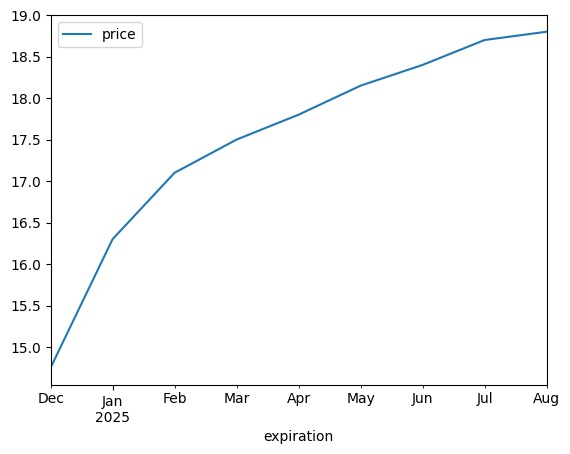

In [54]:
data.plot()

   위 코드를 실행하면 VIX 선물 곡선이 플롯됩니다.

지정된 날짜 범위 내에서 "CL" 기호에 대한 선물 과거 데이터를 가져와서 'data'에 저장
- CL은 NYMEX(New York Mercantile Exchange)에서 거래되는 WTI(West Texas Intermediate) 원유 선물 계약의 티커 심볼입니다.
    - CL: Crude Light Oil (경질유)의 약자
    - WTI 원유 선물 계약의 표준 심볼
    - 1계약당 1,000배럴의 원유를 나타냄
    - 에너지 시장에서 가장 활발하게 거래되는 선물 계약 중 하나

In [55]:
data = obb.derivatives.futures.historical(
    "CL", start_date="2024-01-01", end_date="2026-12-31"
)

In [56]:
display(data)

,open,high,low,close,volume
date,,,,,
2024-01-02,71.709999,73.639999,70.059998,70.379997,330992.0
2024-01-03,70.500000,73.230003,69.279999,72.699997,334861.0
2024-01-04,73.040001,74.000000,71.059998,72.190002,344467.0
2024-01-05,72.400002,74.239998,72.209999,73.809998,325525.0
2024-01-08,73.510002,73.949997,70.129997,70.769997,392249.0
...,...,...,...,...,...
2024-12-03,68.160004,70.230003,67.910004,69.940002,303752.0
2024-12-04,70.019997,70.510002,68.489998,68.540001,325636.0
2024-12-05,68.739998,69.160004,67.980003,68.300003,286701.0


선물 계약의 만기일 목록을 정의

In [57]:
expirations = [
    "2026-12",
    "2027-12",
    "2028-12",
    "2029-12",
    "2030-12",
    "2031-12",    
    "2032-12",    
]

개별 계약 데이터를 저장할 빈 리스트를 초기화

In [58]:
contracts = []

각 만기일에 대해 반복하면서 "CL"의 과거 선물 데이터를 가져와 이름을 변경하고 'contracts'에 추가

In [59]:
# 각 만기일에 대해 반복
for expiration in expirations:
    # CL 선물의 과거 데이터를 가져옴
    df = (
        obb.derivatives.futures.historical(
            symbol="CL",                    # 원유 선물 심볼
            expiration=expiration,          # 만기일
            start_date="2024-01-01",       # 시작일
            end_date="2026-12-31",         # 종료일
        )
    ).rename(columns={"close": expiration}) # 종가 컬럼명을 만기일로 변경
    
    # 만기일 컬럼만 추출하여 contracts 리스트에 추가
    contracts.append(df[expiration])

개별 계약 데이터를 하나의 DataFrame으로 결합하고, 전치한 다음, 결측값이 있는 행을 제거합니다

In [60]:
# contracts 리스트를 DataFrame으로 변환
# transpose()로 행과 열을 바꾸고 
# dropna()로 결측값이 있는 행을 제거
historical = pd.DataFrame(contracts).transpose().dropna()

In [61]:
display(historical)

,2026-12,2027-12,2028-12,2029-12,2030-12,2031-12,2032-12
date,,,,,,,
2024-01-02,64.160004,62.689999,61.779999,61.240002,61.029999,60.930000,60.669998
2024-01-03,65.209999,63.520000,62.540001,62.000000,61.790001,61.689999,61.430000
2024-01-04,64.809998,63.240002,62.299999,61.759998,61.549999,61.450001,61.189999
2024-01-05,65.250000,63.540001,62.549999,62.009998,61.799999,61.700001,61.439999
2024-01-08,64.190002,62.869999,62.160000,61.750000,61.549999,61.480000,61.279999
...,...,...,...,...,...,...,...
2024-12-02,64.419998,63.450001,62.820000,62.389999,62.029999,61.740002,61.490002
2024-12-03,65.410004,64.150002,63.270000,62.619999,62.189999,61.750000,61.369999
2024-12-04,64.379997,63.160000,62.299999,61.610001,61.009998,60.430000,59.810001


가장 최근 과거 계약 데이터를 그래프로 표시

<Axes: >

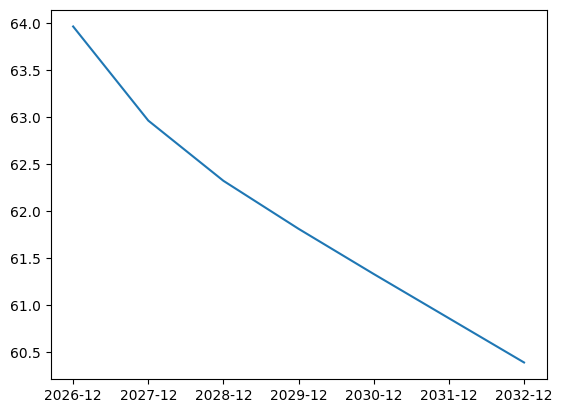

In [62]:
historical.iloc[-1].plot()


### 추가 정보

`obb.derivatives.futures.historical` 메서드를 사용하여 개별 만기 데이터의 과거 데이터를 가져올 수 있습니다. 여러 해에 걸친 데이터를 연결하면 기초 자산의 수요와 공급에 대한 시장의 기대치를 확인할 수 있습니다.

1. **먼저, 관심 있는 연도와 월로 구성된 만기 목록 생성**  
   ```python
   expirations = [
       "2024-12",
       "2025-12",
       "2026-12",
       "2027-12",
       "2028-12",
       "2029-12",
       "2030-12",
   ]
   ```

2. **위 코드는 만기 연도와 날짜를 문자열 형식으로 포함한 Python 리스트를 생성합니다. 그런 다음 각 만기를 반복하여 데이터를 다운로드합니다.**  
   ```python
   contracts = []
   for expiration in expirations:
       df = (
           obb.derivatives.futures.historical(
               symbol="CL",
               expiration=expiration,
               start_date="2020-01-01",
               end_date="2022-12-31"
           )
           .rename(columns={
               "close": expiration
           })
       )
       contracts.append(df[expiration])
   ```

3. **각 계약에 대해, OpenBB 플랫폼을 사용하여 2020년 1월 1일부터 2022년 12월 31일까지의 CL 계약에 대한 과거 선물 데이터를 다운로드합니다.**
   - `pandas rename` 메서드를 사용하여 컬럼 이름을 만기 날짜로 변경합니다.
   - 새로 생성된 pandas DataFrame을 DataFrame 리스트에 추가합니다.

4. **DataFrame을 연결하고, `transpose` 메서드를 사용하여 행과 열을 교환한 후, `dropna` 메서드를 사용하여 데이터가 없는 행을 삭제합니다. 결과 DataFrame을 확인합니다.**  
   ```python
   historical = (
       pd
       .DataFrame(contracts)
       .transpose()
       .dropna()
   )
   print(historical)
   ```
   - 이 데이터는 2023년부터 2030년까지의 12월 만기별로 2020년 1월부터 2022년 12월까지의 과거 정산 가격을 보여줍니다.

5. **시장 기대치를 시각화하려면, 12월 계약의 마지막 가격을 플롯합니다.**
   ```python
   historical.iloc[-1].plot()
   ```

---

### 참고자료

OpenBB 플랫폼의 선물 기능에 대한 추가 정보를 보려면 다음 문서를 참조하세요:

- **OpenBB 플랫폼의 선물 곡선 메서드 문서:**  
  [https://docs.openbb.co/platform/reference/derivatives/futures/curve](https://docs.openbb.co/platform/reference/derivatives/futures/curve)

- **OpenBB 플랫폼의 과거 곡선 메서드 문서:**  
  [https://docs.openbb.co/platform/reference/derivatives/futures/historical](https://docs.openbb.co/platform/reference/derivatives/futures/historical)

--- 

## Navigating options market data with the OpenBB Platform

**OpenBB 플랫폼을 사용한 옵션 시장 데이터 탐색**

옵션은 특정 가격에 특정 날짜 이전에 기초 자산을 매매할 권리(의무는 아님)를 부여하는 거래소 상장 파생 계약입니다. 옵션은 시장에서 가장 다재다능한 금융 상품 중 하나로, 트레이더가 거래 전 위험 프로파일을 정의하고 변동성뿐만 아니라 방향성에 대한 시장 전망을 표현할 수 있도록 합니다. 옵션은 거래에 높은 유연성을 제공하지만, 이러한 특성은 연구와 백테스트를 위한 데이터 수집을 복잡하게 만듭니다.

단일 기초 주식은 행사가와 만기일 조합에 따라 다양한 옵션 계약을 보유할 수 있습니다. 모든 행사가와 만기일에 대한 옵션 계약 조합은 일반적으로 **옵션 체인**이라고 불립니다. 단일 기초 주식에서 수천 개의 옵션 계약이 있을 수 있습니다. 이러한 많은 계약 수가 데이터 분석에 도전 과제를 제시하며, 가격 데이터를 획득하는 것도 전통적으로 비용이 많이 들었습니다. OpenBB 플랫폼의 도입으로, 이제 몇 줄의 Python 코드만으로 옵션 체인 데이터를 pandas DataFrame으로 다운로드할 수 있습니다. 이번 레시피에서는 OpenBB 플랫폼을 사용하여 옵션 데이터를 가져오는 과정을 안내합니다.

>옵션 체인이란? 📊
>하나의 주식에 대해 여러 개의 옵션이 존재
>예를 들어 테슬라 주식의 경우:
>다양한 만기일 (1달 후, 3달 후, 6달 후 등)
>다양한 가격 (현재가 위/아래의 여러 가격대)
>이 모든 조합을 "옵션 체인"이라고 함

---

### 준비하기

현재 가상 환경에 OpenBB 플랫폼이 설치되어 있어야 합니다. 설치가 완료되지 않았다면 이 장의 시작 부분으로 돌아가 설치를 완료하세요.

---

### 수행 방법

과거 선물 데이터를 사용할 때와 마찬가지로, 옵션 데이터를 다운로드하는 데도 OpenBB 플랫폼을 사용할 수 있습니다:

1. **옵션 데이터 시각화를 위해 OpenBB 플랫폼과 Matplotlib 가져오기**


In [63]:
from IPython.display import display
from openbb import obb

In [64]:
obb.user.preferences.output_type = "dataframe"

2. **체인 메서드를 사용하여 전체 옵션 체인 다운로드**

"SPY" 심볼에 대한 옵션 체인을 가져와서 'chains' 변수에 저장

In [65]:
chains = obb.derivatives.options.chains(symbol="SPY")

3. **결과 DataFrame 확인**

In [66]:
display(chains.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9856 entries, 0 to 9855
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   underlying_symbol   9856 non-null   object        
 1   underlying_price    9856 non-null   float64       
 2   contract_symbol     9856 non-null   object        
 3   expiration          9856 non-null   object        
 4   dte                 9856 non-null   int64         
 5   strike              9856 non-null   float64       
 6   option_type         9856 non-null   object        
 7   open_interest       9856 non-null   int64         
 8   volume              9856 non-null   int64         
 9   theoretical_price   9856 non-null   float64       
 10  last_trade_price    9856 non-null   float64       
 11  last_trade_time     8246 non-null   datetime64[ns]
 12  tick                9856 non-null   object        
 13  bid                 9856 non-null   float64     

None

   위 코드를 실행하면 옵션 체인 데이터의 세부정보를 확인할 수 있습니다.  
   - 참고: SPY Exchange Traded Fund(ETF)에는 CBOE(무료)에서 다운로드할 수 있는 8,518개의 옵션 계약이 있습니다.


"yfinance" 제공자를 사용하여 지정된 옵션 심볼에 대한 과거 가격 데이터를 가져오고 "close"와 "volume" 열을 선택합니다


### 작동 방식

`obb.derivatives.options.chain` 메서드는 전체 옵션 체인을 다운로드하여 pandas DataFrame에 저장합니다. 이 메서드는 추가 선택 매개변수도 제공합니다:
- **provider**: 데이터 다운로드 출처를 지정합니다. 기본값은 CBOE이며, Tradier, Intrinio, 또는 TMX도 선택할 수 있습니다. Tradier, Intrinio, TMX를 사용하려면 OpenBB Hub에서 설정할 수 있는 API 키가 필요합니다.

In [67]:
historic = obb.equity.price.historical(
    symbol="SPY241220C00550000", provider="yfinance"
)[["close", "volume"]]

  결과는 옵션 계약의 종가와 거래량이 포함된 pandas DataFrame입니다.

In [68]:
display(historic)

,close,volume
date,,
2023-12-11,3.550000,53
2023-12-12,3.660000,19
2023-12-13,4.290000,109
2023-12-14,4.680000,129
2023-12-15,4.720000,105
...,...,...
2024-12-03,55.830002,9
2024-12-04,58.849998,920
2024-12-05,59.139999,93


과거 "종가" 가격 데이터를 그래프로 표시

<Axes: xlabel='date'>

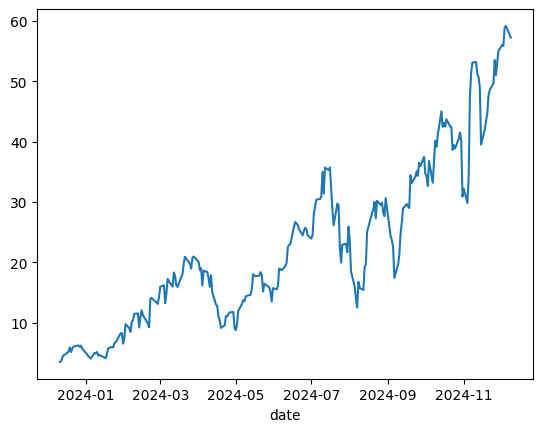

In [69]:
historic.close.plot()

### 추가 정보

- **개별 계약의 과거 옵션 데이터 다운로드:**  
  개별 옵션 계약의 데이터를 다운로드하려면 옵션 심볼이 필요합니다.  
  예를 들어, 2024년 12월 20일 만기이며 행사가가 $550인 SPY 콜 옵션의 과거 데이터를 다운로드하려면 아래와 같이 작성합니다:
  ```python
  data = obb.equity.price.historical(
      symbol="SPY241220C00550000",
      provider="yfinance"
  )[["close", "volume"]]
  ```
  결과는 옵션 계약의 종가와 거래량이 포함된 pandas DataFrame입니다.

#### 옵션 그릭스(Options Greeks)

옵션 그릭스는 기초 주식 가격의 변화에 따라 옵션 가격이 얼마나 변화하는지를 측정합니다.  
- 예: **delta**는 기초 주식 가격 변화에 따른 옵션 가격 변화를 측정합니다.

OpenBB 플랫폼의 `obb.derivatives.options.chain` 메서드를 사용하면 Delta, Gamma, Theta, Vega, Rho와 같은 가장 많이 사용되는 옵션 그릭스를 반환할 수 있습니다.

---

### 참고 자료

옵션은 거래 기회가 풍부한 매력적이고 심도 있는 주제입니다. OpenBB 플랫폼을 통해 옵션, 변동성, 이를 분석하는 방법에 대해 더 많이 배울 수 있습니다:

- **옵션 트레이딩을 위한 무료 기사, 코드 및 기타 자료:**  
  [https://pyquantnews.com/free-python-resources/options-trading-with-python/](https://pyquantnews.com/free-python-resources/options-trading-with-python/)

- **금융 옵션에 대해 잘 모를 경우 자세히 알아보기:**  
  [https://en.wikipedia.org/wiki/Option_(finance)](https://en.wikipedia.org/wiki/Option_(finance))

- **OpenBB 플랫폼의 옵션 메서드 관련 문서:**  
  [https://docs.openbb.co/platform/reference/derivatives/options](https://docs.openbb.co/platform/reference/derivatives/options)

---

## Harnessing factor data using pandas_datareader

**`pandas_datareader`를 사용한 요인 데이터 활용하기**

분산 투자(diversification)는 전체 시장이 하락하기 전까지만 효과적입니다. 전체 시장이 모든 자산에 영향을 미칠 때 요인은 이러한 위험 중 일부를 상쇄할 수 있습니다.  
요인은 시장에 영향을 받지 않는 수익의 원인을 목표로 삼습니다.  
대표적인 요인은 **크기**(대형주 vs. 소형주)와 **스타일**(가치주 vs. 성장주)입니다.  
- 예를 들어, 소형주가 대형주를 초과 수익을 낼 것이라고 판단하면 소형주에 투자하고, 가치주가 성장주를 초과 수익을 낼 것이라고 판단하면 가치주에 노출됩니다.

어느 쪽이든, 요인이 수익률에 기여하는 정도를 측정하고 싶을 것입니다.  
유진 파마(Eugene Fama)와 케네스 프렌치(Kenneth French)는 1992년에 Fama-French 3요인 모델을 도입했습니다.  
이는 자본과 자산 대비 시장 가치(book-to-market)를 기준으로 한 6개의 가치 가중 포트폴리오를 사용하여 계산됩니다.

#### 3가지 주요 요인은 다음과 같습니다:
- **Small Minus Big (SMB):**  
  세 개의 소형주 포트폴리오와 세 개의 대형주 포트폴리오 평균 수익률 차이
- **High Minus Low (HML):**  
  두 가치주 포트폴리오와 두 성장주 포트폴리오 간 평균 수익률 차이
- **Rm-Rf:**  
  무위험 금리 초과 시장 수익률

이 레시피에서는 `pandas_datareader`를 사용하여 과거 요인 데이터를 가져와 분석에 활용하는 방법을 안내합니다.

---

### 준비하기

현재 가상 환경에 OpenBB 플랫폼이 설치되어 있어야 하며, `pandas_datareader`가 설치되어 있어야 합니다. 설치가 완료되지 않았다면 이 장의 시작 부분으로 돌아가 설치를 완료하세요.

In [70]:
# !pip install pandas_datareader

In [71]:
import warnings

---

### 수행 방법

`pandas_datareader` 라이브러리를 사용하여 수십 개의 투자 연구 요인에 접근할 수 있습니다:

1. **`pandas_datareader` 가져오기**

In [72]:
import pandas_datareader as pdr
from IPython.display import display

In [73]:
warnings.filterwarnings("ignore")

Fetches the Fama-French research data factors and stores it in 'factors'

2. **2000년 1월부터 시작하는 월간 요인 데이터 다운로드**

In [74]:
factors = pdr.get_data_famafrench(
    "F-F_Research_Data_Factors",
)

3. **요인 데이터 설명 확인**

In [75]:
display(factors["DESCR"])

'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEME_RETS using the 202410 CRSP database. The 1-month TBill rate data until 202405 are from Ibbotson Associates. Starting from 202406, the 1-month TBill rate is from ICE BofA US 1-Month Treasury Bill Index. Copyright 2024 Eugene F. Fama and Kenneth R. French\n\n  0 : (59 rows x 4 cols)\n  1 : Annual Factors: January-December (5 rows x 4 cols)'

'factors'의 첫 번째 데이터셋의 처음 몇 행을 표시

4. **월간 요인 데이터 확인**

In [76]:
data = factors[0].head()

In [77]:
display(data)

,Mkt-RF,SMB,HML,RF
Date,,,,
2019-12,2.77,0.73,1.78,0.14
2020-01,-0.11,-3.13,-6.25,0.13
2020-02,-8.13,1.07,-3.80,0.12
2020-03,-13.39,-4.79,-13.88,0.13
2020-04,13.65,2.45,-1.34,0.00


5. **연간 요인 데이터 확인**

'factors'의 두 번째 데이터셋의 처음 몇 행을 표시

In [78]:
data = factors[1].head()

In [79]:
display(data)

,Mkt-RF,SMB,HML,RF
Date,,,,
2019,28.28,-6.13,-10.37,2.15
2020,23.66,12.72,-46.10,0.45
2021,23.57,-3.78,25.39,0.04
2022,-21.58,-7.04,25.97,1.43
2023,21.69,-3.28,-13.70,4.95


지정된 날짜 범위 내의 Fama-French 연구 데이터 요인을 가져와서 'factors'에 저장

In [81]:
# Fama-French 연구 데이터 요인을 가져옴
# start: 2000년 1월 1일부터
# end: 2019년 12월 31일까지의 데이터
factors = pdr.get_data_famafrench(
    "F-F_Research_Data_Factors", start="2000-01-01", end="2019-12-31"
)

In [82]:
display(factors)

{0:          Mkt-RF    SMB   HML    RF
 Date                              
 2000-01   -4.74   5.77 -1.88  0.41
 2000-02    2.45  21.36 -9.59  0.43
 2000-03    5.20 -17.20  8.13  0.47
 2000-04   -6.40  -6.68  7.26  0.46
 2000-05   -4.42  -6.05  4.75  0.50
 ...         ...    ...   ...   ...
 2019-08   -2.58  -2.39 -4.79  0.16
 2019-09    1.43  -0.97  6.77  0.18
 2019-10    2.06   0.29 -1.90  0.16
 2019-11    3.88   0.78 -1.99  0.12
 2019-12    2.77   0.73  1.78  0.14
 
 [240 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2000  -17.60  -4.60  44.98  5.89
 2001  -15.21  18.16  18.52  3.83
 2002  -22.76   4.39   8.09  1.65
 2003   30.75  26.49   4.67  1.02
 2004   10.72   4.45   7.61  1.20
 2005    3.09  -2.36   9.41  2.98
 2006   10.60   0.09  11.93  4.80
 2007    1.04  -7.44 -17.18  4.66
 2008  -38.34   2.40   1.05  1.60
 2009   28.26   9.18  -9.65  0.10
 2010   17.37  14.15  -5.15  0.12
 2011    0.44  -5.73  -8.41  0.04
 2012   16.27  -1.40  1

### 작동 방식

`pandas_datareader`는 Fama-French 데이터 라이브러리에서 압축된 CSV 파일을 다운로드하고 이를 압축 해제하여 pandas DataFrame을 생성합니다.  
Fama-French 데이터 라이브러리에서는 다양한 지역의 Fama-French 3요인 모델에 대한 데이터를 포함한 297개의 서로 다른 요인 데이터셋을 제공합니다.  
다음은 인기 있는 Fama-French 3요인 모델 버전들입니다:

- **Developed_3_Factors**  
- **Developed_ex_US_3_Factors**  
- **Europe_3_Factors**  
- **Japan_3_Factors**  
- **Asia_Pacific_ex_Japan_3_Factors**

이 데이터셋들은 `get_data_famafrench` 메서드에서 `F-F_Research_Data_Factors`처럼 사용할 수 있습니다.

일부 데이터셋은 서로 다른 시간 프레임, 포트폴리오 가중치 방법론, 종합 통계 데이터를 나타내는 여러 개의 DataFrame을 포함하는 딕셔너리 형태로 반환됩니다.  
예를 들어, **5_Industry_Portfolios** 데이터셋은 딕셔너리 안에 8개의 DataFrame을 반환합니다.  
- 첫 번째 데이터는 `0` 키를 사용하여, 두 번째 데이터는 `1` 키를 사용하여 접근할 수 있습니다.  
- 각 딕셔너리는 데이터셋에 대한 설명을 포함하며, 이는 `DESCR` 키를 사용하여 접근할 수 있습니다.

---

### 추가 정보

`pandas_datareader`는 Tiingo, IEX, Alpha Vantage, FRED, Eurostat 등 여러 원격 온라인 소스에서 데이터를 가져오는 데 사용할 수 있습니다.  
전체 데이터 소스 목록은 문서 페이지에서 확인하세요:  
[https://pandas-datareader.readthedocs.io/en/latest/remote_data.html](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

---

### 추가 참고 자료

투자 연구 라이브러리에서 사용되는 요인들에 대한 자세한 내용은 아래 리소스를 참고하세요.  
Fama-French 3요인 모델 사용 예제를 보려면 PyQuant News 웹사이트의 리소스를 확인하세요:

- Fama-French 요인 데이터 문서:  
  [https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

- Fama-French 3요인 모델에 대한 세부 정보:  
  [https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html)

- Fama-French 3요인 모델을 활용한 코드 가이드:  
  [https://www.pyquantnews.com/past-pyquant-newsletter-issues](https://www.pyquantnews.com/past-pyquant-newsletter-issues)

## Getting data from Nasdaq Data Link

In [ ]:
import nasdaqdatalink
from IPython.display import display

In [ ]:
nasdaqdatalink.ApiConfig.api_key = "YOUR_API_KEY"

Fetches data for the specified NASDAQ dataset and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get("CHRIS/CME_ES1")

In [ ]:
display(data)

Fetches the data in numpy array format for the specified dataset

In [ ]:
data = nasdaqdatalink.get("CHRIS/CME_ES1", returns="numpy")

In [ ]:
display(data)

Fetches data for the specified dataset within the given date range and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get(
    "CHRIS/CME_ES1", start_date="2001-12-31", end_date="2005-12-31"
)

In [ ]:
display(data)

Fetches data for a specific column in the dataset within the given date range and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get(
    "CHRIS/CME_ES1.8", start_date="2001-12-31", end_date="2005-12-31"
)

In [ ]:
display(data)

Fetches data for the specified dataset with monthly aggregation and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get("CHRIS/CME_ES1", collapse="monthly")

In [ ]:
display(data)

Defines a list of contract codes to fetch data for multiple contracts

In [ ]:
contracts = [
    "CHRIS/CME_ES1.6",
    "CHRIS/CME_ES2.6",
    "CHRIS/CME_ES3.6",
    "CHRIS/CME_ES4.6",
]

Fetches data for the specified contracts within the given date range and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get(contracts, start_date="2015-01-01", end_date="2015-12-31")

Plots the data for the first contract on the first available date

In [ ]:
data.iloc[0].plot(title=f"ES on {data.index[0]}")

## Exploring S&P 500 ratios data with Nasdaq Data Link

In [ ]:
import nasdaqdatalink
from IPython.display import display

In [ ]:
nasdaqdatalink.ApiConfig.api_key = "YOUR_API_KEY"

Fetches S&P 500 dividend yield data and stores it in 'data'

In [ ]:
data = nasdaqdatalink.get("MULTPL/SP500_DIV_YIELD_MONTH")

In [ ]:
display(data)

Plots the S&P 500 dividend yield data with the specified title

In [ ]:
data.plot(title="S&P 500 dividend yield (12 month dividend per share)/price")